In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import warnings
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
FOLDERNAME = 'TNT_VISION'
assert FOLDERNAME is not None, "[!] Enter the foldername."
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

%cd /content/drive/My\ Drive/$FOLDERNAME

Mounted at /content/drive
/content/drive/My Drive/TNT_VISION


In [2]:
df = pd.read_pickle('LSWMD.pkl')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   waferMap        811457 non-null  object 
 1   dieSize         811457 non-null  float64
 2   lotName         811457 non-null  object 
 3   waferIndex      811457 non-null  float64
 4   trianTestLabel  811457 non-null  object 
 5   failureType     811457 non-null  object 
dtypes: float64(2), object(4)
memory usage: 37.1+ MB


In [4]:
df.sample(20)
#failureType, trianTestLabel이 empty인 data가 굉장히 많음

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
771864,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1376.0,lot45930,3.0,[[Test]],[[none]]
420282,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",822.0,lot25233,8.0,[],[]
552702,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2,...",712.0,lot34713,1.0,[],[]
259194,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2847.0,lot16073,14.0,[],[]
342397,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2570.0,lot20523,11.0,[],[]
800167,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",562.0,lot47082,2.0,[[Test]],[[none]]
141630,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2,...",710.0,lot9165,10.0,[],[]
494599,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1513.0,lot30631,15.0,[],[]
58572,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1801.0,lot4669,13.0,[],[]
303695,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",4096.0,lot18552,21.0,[],[]


In [5]:
Center = sum(df.iloc[:,5] == 'Center')
Donut = sum(df.iloc[:,5] == 'Donut')
Edge_loc = sum(df.iloc[:,5] == 'Edge-Loc')
Edge_ring = sum(df.iloc[:,5] == 'Edge-Ring')
Loc = sum(df.iloc[:,5] == 'Loc')
Random = sum(df.iloc[:,5] == 'Random')
Scratch = sum(df.iloc[:,5] == 'Scratch')
Near = sum(df.iloc[:,5] == 'Near-full')

/usr/local/lib/python3.7/dist-packages/pandas/core/ops/array_ops.py:56: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = libops.scalar_compare(x.ravel(), y, op)


In [6]:
normal = sum(df['failureType'] == 'none')

/usr/local/lib/python3.7/dist-packages/pandas/core/ops/array_ops.py:56: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = libops.scalar_compare(x.ravel(), y, op)


In [7]:
def find_dim(x):
    dim0=np.size(x,axis=0)
    dim1=np.size(x,axis=1)
    return dim0,dim1
df['waferMapDim']=df.waferMap.apply(find_dim)
df.sample(5)

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType,waferMapDim
680320,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,...",845.0,lot42222,16.0,[[Test]],[[none]],"(35, 31)"
496353,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1513.0,lot30796,22.0,[],[],"(49, 39)"
35731,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",3031.0,lot3294,2.0,[],[],"(54, 71)"
416872,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2367.0,lot24876,22.0,[],[],"(51, 59)"
531905,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,...",710.0,lot33282,7.0,[],[],"(32, 29)"


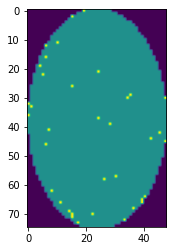

In [8]:
plt.imshow(df.iloc[272305][0])

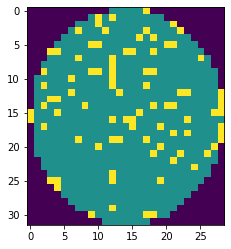

In [9]:
plt.imshow(df.iloc[561682][0])

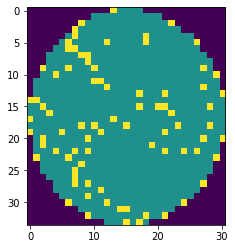

In [10]:
plt.imshow(df.iloc[140069][0])

In [11]:
max(df.waferMapDim), min(df.waferMapDim)

((300, 202), (6, 21))

In [12]:
df.waferMapDim.value_counts()

(32, 29)    108687
(25, 27)     64083
(49, 39)     39323
(26, 26)     30078
(30, 34)     29513
             ...  
(65, 41)         1
(43, 41)         1
(39, 65)         1
(87, 81)         1
(21, 17)         1
Name: waferMapDim, Length: 632, dtype: int64

In [13]:
uni_waferDim=np.unique(df.waferMapDim, return_counts=True)

In [14]:
df['failureNum']=df.failureType
df['trainTestNum']=df.trianTestLabel

In [15]:
mapping_type={'Center':0,'Donut':1,'Edge-Loc':2,'Edge-Ring':3,'Loc':4,'Random':5,'Scratch':6,'Near-full':7,'none':8}
mapping_traintest={'Training':0,'Test':1}
df=df.replace({'failureNum':mapping_type, 'trainTestNum':mapping_traintest})

/usr/local/lib/python3.7/dist-packages/pandas/core/internals/managers.py:1985: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  op = lambda x: operator.eq(x, b)


In [16]:
df_withlabel = df[(df['failureNum']>=0) & (df['failureNum']<=8)]
df_withlabel =df_withlabel.reset_index()
df_withpattern = df[(df['failureNum']>=0) & (df['failureNum']<=7)]
df_withpattern = df_withpattern.reset_index()
df_nonpattern = df[(df['failureNum']==8)]
df_withlabel.shape[0], df_withpattern.shape[0], df_nonpattern.shape[0]


(172950, 25519, 147431)

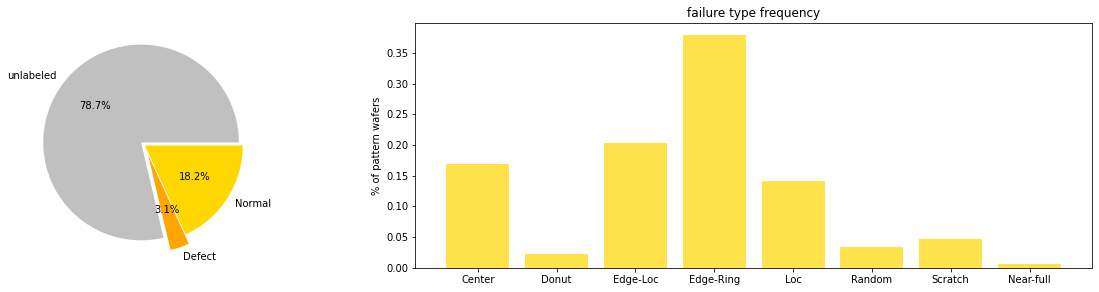

In [17]:
from matplotlib import gridspec
fig = plt.figure(figsize=(20, 4.5)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2]) 
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax1.pie([df.shape[0] - df_withlabel.shape[0], df_withpattern.shape[0] , df_nonpattern.shape[0]],explode = (0.05, 0.1, 0) , colors = ['silver','orange', 'gold'],labels=['unlabeled','Defect','Normal'], autopct='%.1f%%')
#ax2.pie([Center, Donut, Edge_loc ,Edge_ring, Loc , Random , Scratch , Near ], labels = ['Center','Donut','Edge-Loc','Edge-Ring','Loc','Random','Scratch','Near-full'])
uni_pattern=np.unique(df_withpattern.failureNum, return_counts=True)
labels2 = ['','Center','Donut','Edge-Loc','Edge-Ring','Loc','Random','Scratch','Near-full']
ax2.bar(uni_pattern[0],uni_pattern[1]/df_withpattern.shape[0], color='gold', align='center', alpha=0.7)
ax2.set_title("failure type frequency")
ax2.set_ylabel("% of pattern wafers")
ax2.set_xticklabels(labels2)

plt.show()

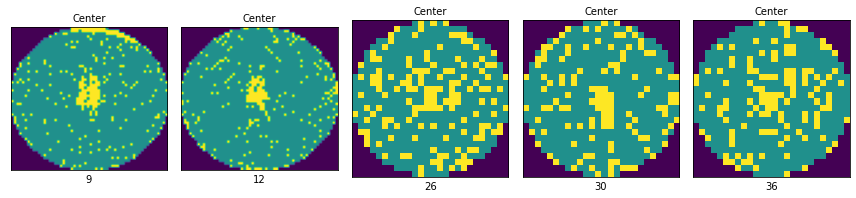

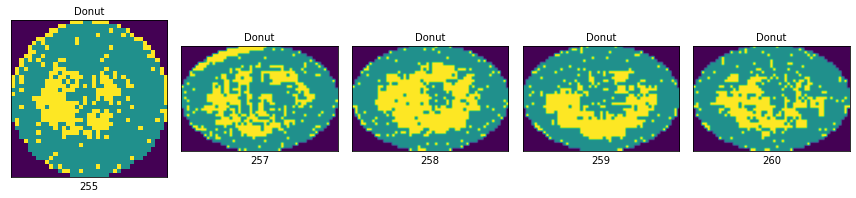

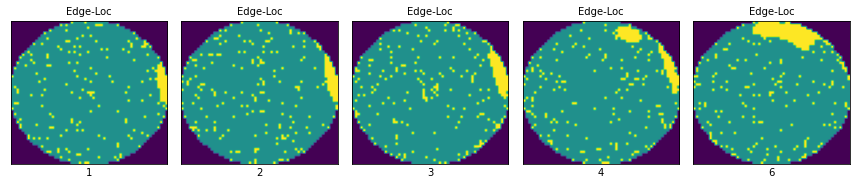

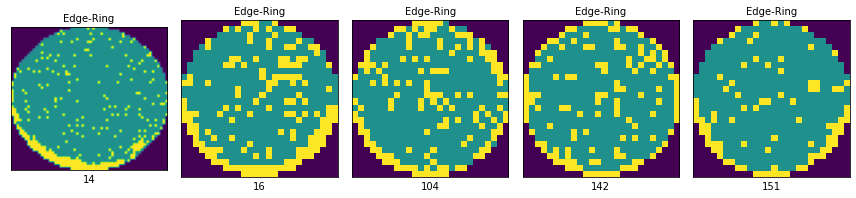

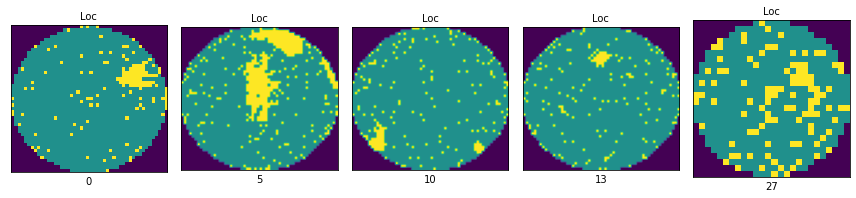

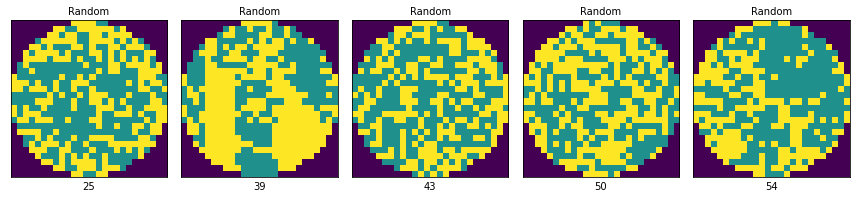

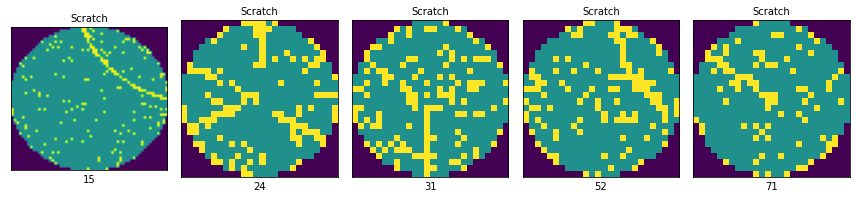

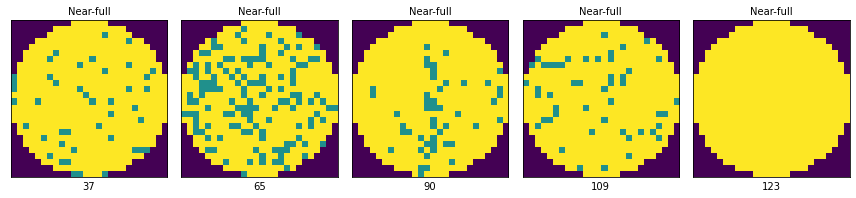

In [18]:
x = [0,1,2,3,4,5,6,7]

defect_label = ['Center', 'Donut', 'Edge-Loc', 'Edge-Ring', 'Loc', 'Random','Scratch','Near-full']


for k in x:
  fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize = (12, 6))
  ax = ax.ravel(order = 'C')

  for j in [k] :
    img = df_withpattern.waferMap[df_withpattern.failureType == defect_label[j]]# index 와 value가 저장됨
    for i in range(5):
            ax[i].imshow(img[img.index[i]])
            ax[i].set_title(df_withpattern.failureType[img.index[i]][0][0], fontsize=10)
            ax[i].set_xlabel(df_withpattern.index[img.index[i]], fontsize=10)
            ax[i].set_xticks([])
            ax[i].set_yticks([])
    plt.tight_layout()
    plt.show() 